# Import modules

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib.mlab import griddata
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

# Basic map 

In this tutorial, we will be showing how to plot data on top of a map in many different ways. So then, let's make a function to make a basic map of Japan that we can use over and over again.

In [2]:
def basic_Japan_map():
    
    fig, ax = plt.subplots(figsize=(8,8))
    m = Basemap(projection='merc'
            , llcrnrlat=28        # the LOWER LEFT corner of latitude
            , urcrnrlat=48        # the UPPER RIGHT corner of latitude
            , llcrnrlon=125      # the LOWER LEFT corner of longitude
            , urcrnrlon=150
            , resolution='c'
            , ax=ax)
    m.drawcoastlines()

    return fig, ax, m

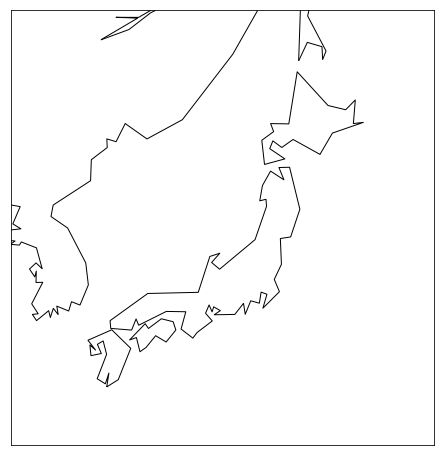

In [3]:
# plot our basic Japan map
fig, ax, m = basic_Japan_map()

Now that we have a function that creates a basic map we can call the function <i>basic_Japan_map(  )</i> any time we would like to add data to it.

# Contour plot - Linear scale

We will first create a linear scaled contour plot on top of our basic Japan map.

Let's create some random data for lon/lat coordinates of Japan.

In [4]:
npoints = 2000                                  
lons = np.random.uniform(125, 150, npoints)
lats = np.random.uniform(28, 48, npoints)
data = np.random.uniform(0.5, 1.5, npoints)

# print some of the points and data to the screen
print(lons[0:5])
print(lats[0:5])
print(data[0:5])

[ 127.51337876  143.43193852  137.53149727  141.20625831  126.91534612]
[ 40.36808795  30.4176951   39.92260908  41.0529583   32.58082206]
[ 1.33057169  0.55698832  0.67565139  1.23933048  0.67595619]


As you can see, the x and y points (lons, lats) are not regularly spaced. Therefore, we need to define a grid for mapping our randomly spaced data and then we will interpolate our data to this grid. 

<u>Some things to remember about interpolation:</u>

Interpolation is necessary when data are not at grid intersections, or are irregular or sparse. 

Interpolation becomes extrapolation 1) when areas deficient of points are interpolated, and 2) when interpolation is carried outside the data area. 

In [5]:
# define a regularly spaced grid
lon_i  = np.linspace(125, 150, (150-125)+1)        
lat_i = np.linspace(28, 48, (48 - 28)+1)

# print some of the new grid to the screen 
print(lon_i[0:5])
print(lat_i[0:5])

[ 125.  126.  127.  128.  129.]
[ 28.  29.  30.  31.  32.]


Oh that looks a lot better for plotting! 

Now, we can map our random data to this grid using interpolation. There are many types of interpolation. Your style choice of interpolation affects the result. For more information about interpolation choices and their affects, see [this page](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.griddata.html).

Here, we will use a linear interpolation for gridding our randomly spaced data and add it to our basic Japan map. 

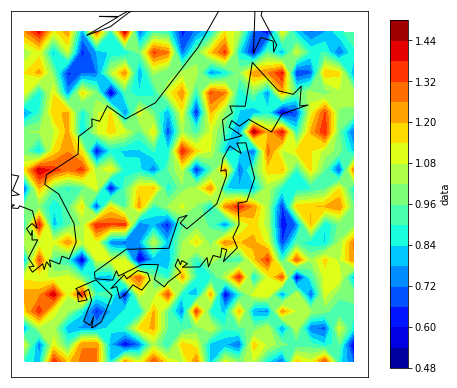

In [6]:
fig, ax, m = basic_Japan_map()               # make our basic Japan map

xi, _yi = m(lon_i, np.zeros_like(lon_i))     # grid in projected coordinate system
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)                         # our data in projected coordinate system

zi = griddata(x, y, data                     # grid the randomly spaced data 
               , xi, yi
               , interp='linear')     

cbar = ax.contourf(xi, yi, zi                # plot the contours
            , 15                             # number of levels
            , cmap='jet')                    # colormap


fig.colorbar(cbar, label='data',shrink=0.8)  # plot the colorbar and label as "data"

# Contour plot - Log scale

What if we want our data to be plotted in log scale?  In this case, we would need to import <i>LogNorm</i> from the <i>matplotlib.colors</i> module.

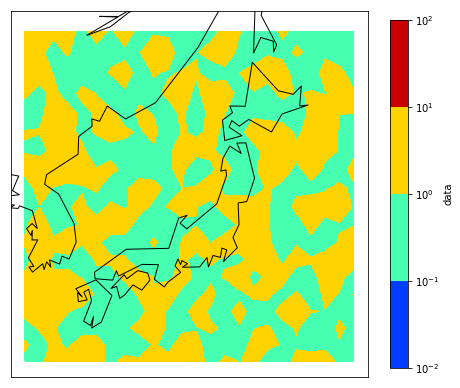

In [7]:
from matplotlib.colors import LogNorm           # import LogNorm 

fig, ax, m = basic_Japan_map()               # make our basic Japan map

cbar = ax.contourf(xi, yi, zi                # plot the contours
            , 15                             # number of levels
            , cmap='jet'                     # colormap
            , norm=LogNorm())   # set scale as log for z-axis ticks) 

fig.colorbar(cbar, label='data',shrink=0.8)  # plot the colorbar and label as "data"

# Block plot - Linear scale

What if we want our data to be plotted in regularly defined mesh without smoothing between blocks?

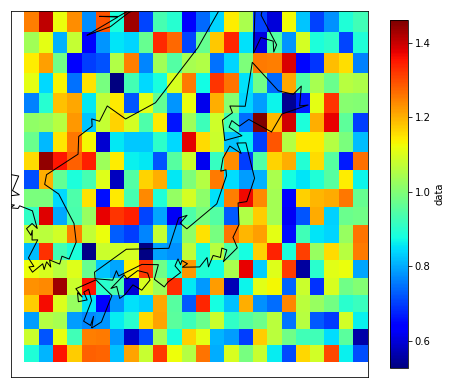

In [8]:
fig, ax, m = basic_Japan_map()               # make our basic Japan map

cbar = ax.pcolormesh(xi, yi, zi              # plot color mesh
              , cmap='jet')                  # colormap

fig.colorbar(cbar, label='data',shrink=0.8)  # plot the colorbar and label as "data" 

# Block plot - Log scale

What if we want our data to be plotted in a regularly defined mesh without smoothing between blocks but in a log scale? 

/home/john/anaconda3/envs/basemap/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


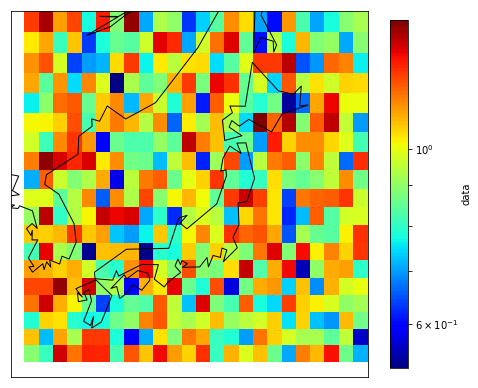

In [9]:
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax, m = basic_Japan_map()                  # make our basic Japan map

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , vmin=np.min(zi)                 # z scale bar minimum
              , vmax=np.max(zi)                 # z scale bar maximum
              , cmap='jet'                      # colormap
              , norm=LogNorm())                 # set scale as log for z-axis ticks 

fig.colorbar(cbar, label='data',shrink=0.8)     # plot the colorbar and label as "data"


# Plotting with real earthquake data

Let's work some real earthquake data, but first we need to prepare it. Let's load an ANSS (Advanced National Seismic System) catalog. This is a catalog of magnitude >= 5 events from all around the world occurring between 1997 to 2010.

In [12]:
# read some earthquake data from the Advanced National Seismic System
df = pd.read_csv('../data/anss.csv', delim_whitespace=True)
df = df[df.index>=1] # remove the row with the dash line

In [13]:
df.describe()

,Lat,Lon,Depth,Mag,Nst,RMS,Event,ID
count,20835.000000,20835.000000,20835.000000,20835.000000,20835.000000,2.071000e+04,3.400000e+01,0.0
mean,1.175284,43.176381,59.520817,5.379757,155.590353,1.996423e+11,1.588324e+07,NaN
std,29.037107,121.061153,103.214783,0.420100,125.361223,1.220162e+10,1.609338e+07,NaN
min,-67.139000,-180.000000,-5.000000,5.000000,0.000000,4.000000e-02,1.129580e+05,NaN
25%,-17.739000,-71.425000,10.000000,5.100000,63.000000,2.001022e+11,1.232457e+06,NaN
50%,-3.068000,97.731000,33.000000,5.300000,117.000000,2.004121e+11,5.793165e+06,NaN
75%,21.548000,142.606000,48.800000,5.500000,211.000000,2.007072e+11,2.802485e+07,NaN
max,86.283000,179.998000,691.600000,9.000000,929.000000,2.009123e+11,5.118347e+07,NaN


In [14]:
# cut the data around Japan
df = df[df.Lon.between(125, 150) & df.Lat.between(28, 48)].copy()
        
# count the number of earthquakes in each rounded latitude/longitude pair
eq_count = df.groupby(['Lat', 'Lon']).apply(round).groupby(['Lat','Lon']).count().reset_index()

# define the grid
lon_i = np.linspace(125, 150, (150 - 125) + 1)
lat_i = np.linspace(28, 48, (48 - 28) + 1)

# redefine the input for contour plot
data = eq_count.Mag.values
lons = eq_count.Lon.values
lats = eq_count.Lat.values

# Plotting real earthquake data as contours

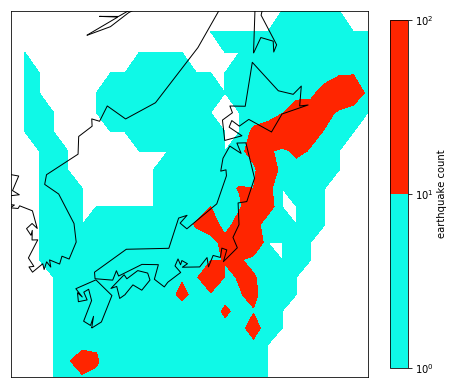

In [15]:
from matplotlib.colors import LogNorm        # import LogNorm

fig, ax, m = basic_Japan_map()               # make our basic Japan map

xi, _yi = m(lon_i, np.zeros_like(lon_i))     # grid in projected coordinate system
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)                         # our data in projected coordinate system

zi = griddata(x, y, data                     # grid the randomly spaced data 
               , xi, yi
               , interp='linear')     

zi = np.ma.masked_invalid(zi)

# because we are doing contours, we should set levels
# i.e., set discrete values for earthquake count

low_power = 0                                # minimum number of earthquakes = 10^0 = 1
high_power = np.ceil(np.log10(np.max(zi)))   # highest power for number of earthquakes

# we set levels to provide the boundaries for the contour map
levels = np.logspace(low_power,high_power
                     ,num=high_power-low_power+1
                     ,base=10.0,endpoint=True)

cbar = ax.contourf(xi, yi, zi                # plot the contours
            , levels=levels
            , cmap='jet'
            , norm=LogNorm())

fig.colorbar(cbar, label='earthquake count',shrink=0.8)  # plot the colorbar and label as "data"

# Plotting real earthquake data as box plot

/home/john/anaconda3/envs/basemap/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


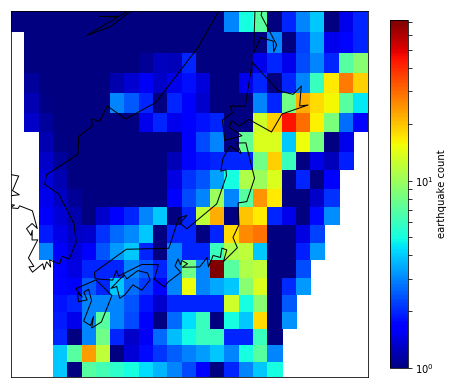

In [16]:
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax, m = basic_Japan_map()                  # make our basic Japan map

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh                
              , cmap='jet'                      # colormap
              , norm=LogNorm())                 # set scale as log for z-axis ticks 

fig.colorbar(cbar, label='earthquake count',shrink=0.8)     # plot the colorbar and label as "data"


# Plotting real earthquake data without interpolation

The <i>griddata</i> function uses interpolation to smooth our data over regions where no data exists. Therefore, we should exercise caution when using interpolation or "bin" our data without interpolation. In this section, we will show how to grid our data without interpolation using Pandas.

In [17]:
# create new indices 
from itertools import product
new_index = [x for x in product(lon_i, lat_i)]

# set the indices and columns to be the longitude and latitude pairs
# keep only the latitude, longitude, and magnitude information
bdata = eq_count.set_index(['Lon', 'Lat']).reindex(new_index).reset_index()[['Lon', 'Lat', 'Mag']].copy()

# pivot the data for plotting (makes it look like a matrix!)
zi = bdata.pivot(index='Lat', columns='Lon', values='Mag').values

Now let's plot the data...

/home/john/anaconda3/envs/basemap/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


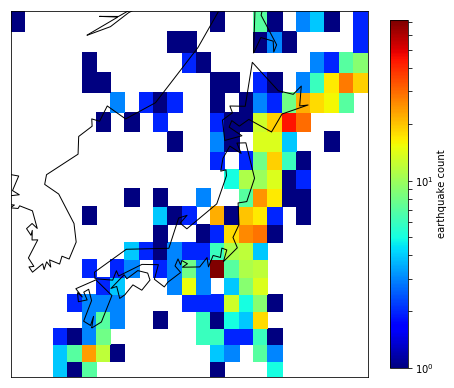

In [18]:
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax, m = basic_Japan_map()                  # make our basic Japan map

xi, _yi = m(lon_i, np.zeros_like(lon_i))
_xi, yi = m(np.zeros_like(lat_i), lat_i)

x, y = m(lons, lats)

xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi)

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , cmap='jet'                      # colormap
              , norm=LogNorm())                 # set scale as log for z-axis ticks

fig.colorbar(cbar, label='earthquake count',shrink=0.8)     # plot the colorbar and label as "data"

This looks similar to the real earthquake data box plot, but there is no interpolation in areas where data does not exist!